In [1]:
#Libraries
import pandas as pd
import matplotlib as plt
import numpy as np
from ing_theme_matplotlib import mpl_style
mpl_style(dark=True)
import seaborn as sns

### Databases to work:

In [2]:
CO2=pd.read_csv('CO2_Ampliado.csv')           
P10=pd.read_csv('DFPob10.csv') 
POBA= pd.read_csv("pop_worldometer_data.csv")

### Adjustment in Database (CO2):

In [3]:
DFCO2=pd.DataFrame(data=CO2)       #DataFrame
DFCO2=DFCO2.drop(["CO2_CAN"],axis=1) #We delete the columns, we don´t want to show, in this case, Canada´s data
DFCO2.index = np.arange(1,len(DFCO2)+1) 
DFCO2.head()

,Year,CO2_MEX,CO2_USA,CO2_CHINA,CO2_IND,CO2_UK,CO2_RUS,CO2_JPN,CO2_QAT,CO2_AUS,CO2_SA
1,1960,1.670990,15.999779,1.170381,0.267634,11.150759,12.082349,2.516538,3.714672,8.582937,5.727221
2,1961,1.675961,15.681256,0.836047,0.283704,11.154139,12.322513,2.981979,3.137784,8.641569,5.832621
3,1962,1.587485,16.013938,0.661428,0.305851,11.142928,12.790095,3.059736,3.389215,8.835688,5.887170
4,1963,1.600528,16.482762,0.640002,0.321795,11.254853,13.565060,3.359321,99.464612,9.226440,5.961336
5,1964,1.736658,16.968119,0.625646,0.308169,11.265839,14.267057,3.673035,92.860862,9.759073,6.332342


### Adjustment in Database (creating a full Dataset)

In [4]:
DFP10=pd.DataFrame(data=P10)
DFF=DFP10
DFF=DFF.join(DFCO2.set_index('Year'), on='Year')
DFF.head()


,Year,Pob_Mex,Pob_USA,Pob_China,Pob_India,Pob_UK,Pob_Rus,Pob_Japan,Pob_Qatar,Pob_Aus,...,CO2_MEX,CO2_USA,CO2_CHINA,CO2_IND,CO2_UK,CO2_RUS,CO2_JPN,CO2_QAT,CO2_AUS,CO2_SA
0,1960,37771859,180671000,667070000,450547679,52400000,119897000,92500572,47384,10276477,...,1.670990,15.999779,1.170381,0.267634,11.150759,12.082349,2.516538,3.714672,8.582937,5.727221
1,1961,38966056,183691000,660330000,459642165,52800000,121236000,94943000,51421,10483000,...,1.675961,15.681256,0.836047,0.283704,11.154139,12.322513,2.981979,3.137784,8.641569,5.832621
2,1962,40195319,186538000,665770000,469077190,53250000,122591000,95832000,56262,10742000,...,1.587485,16.013938,0.661428,0.305851,11.142928,12.790095,3.059736,3.389215,8.835688,5.887170
3,1963,41462369,189242000,682335000,478825608,53650000,123960000,96812000,61716,10950000,...,1.600528,16.482762,0.640002,0.321795,11.254853,13.565060,3.359321,99.464612,9.226440,5.961336
4,1964,42771079,191889000,698355000,488848135,54000000,125345000,97826000,67566,11167000,...,1.736658,16.968119,0.625646,0.308169,11.265839,14.267057,3.673035,92.860862,9.759073,6.332342


### Graphs / Gráficas

<AxesSubplot:title={'center':'Graph of population without China and India'}, xlabel='Year'>

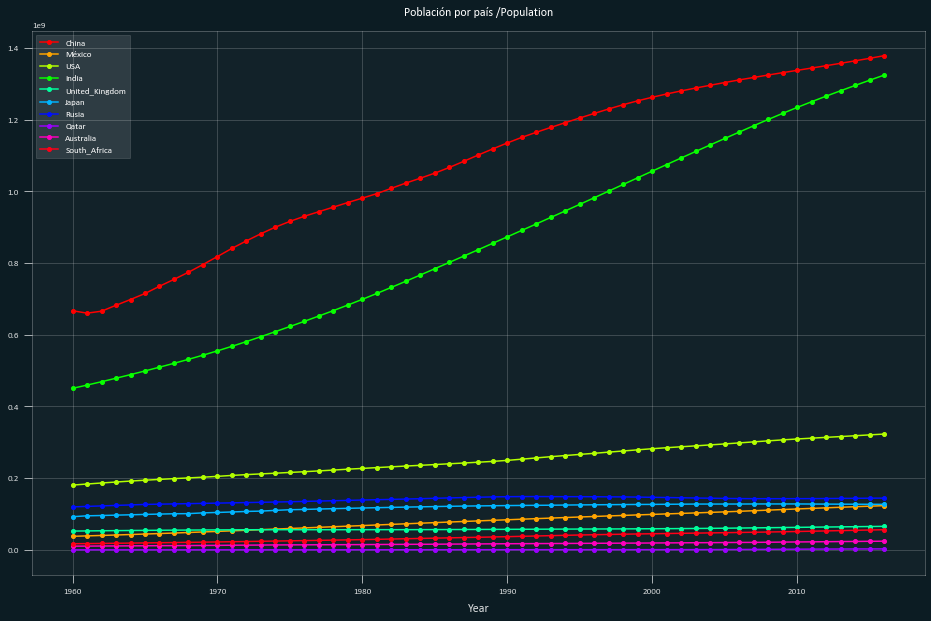

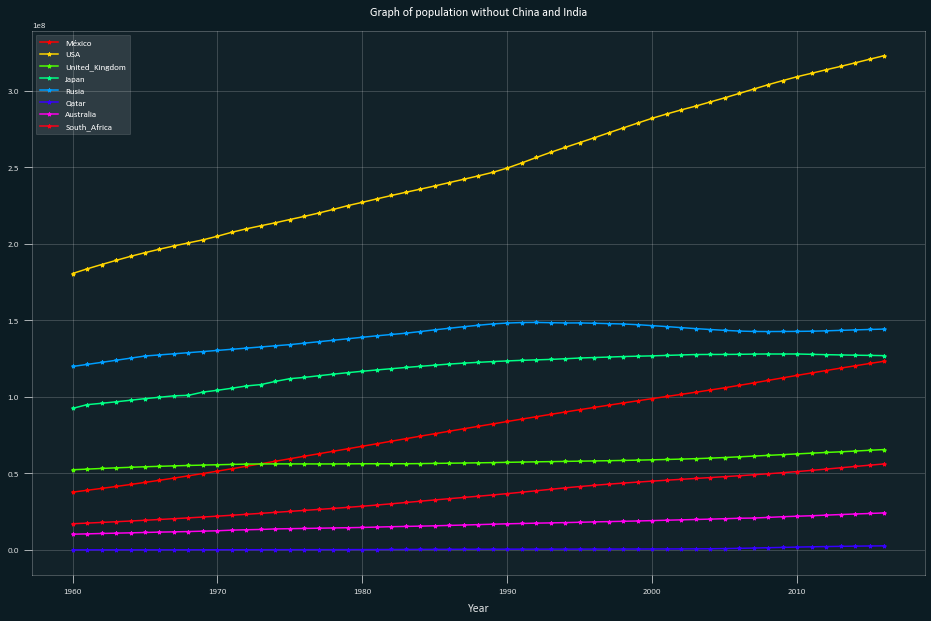

In [5]:
Pob= DFF.groupby('Year').agg(China =('Pob_China','sum'), México=('Pob_Mex','sum'),USA=('Pob_USA','sum'),
India=('Pob_India','sum'), United_Kingdom=('Pob_UK','sum'),Japan=('Pob_Japan','sum'),
Rusia=('Pob_Rus','sum'),Qatar=('Pob_Qatar','sum'), Australia=('Pob_Aus','sum'),South_Africa=('Pob_SA','sum'))
Pob.plot(kind='line',title= 'Población por país /Population', style='-o', cmap='hsv',figsize=(16,10),grid="on")
Pob2= DFF.groupby('Year').agg(México=('Pob_Mex','sum'),USA=('Pob_USA','sum'), United_Kingdom=('Pob_UK','sum'),
Japan=('Pob_Japan','sum'), Rusia=('Pob_Rus','sum'),Qatar=('Pob_Qatar','sum'), Australia=('Pob_Aus','sum'),
South_Africa=('Pob_SA','sum'))
Pob2.plot(kind='line',title= 'Graph of population without China and India', style='-*', cmap='hsv',figsize=(16,10),grid="on")

<AxesSubplot:title={'center':'CO2 por país sin Qatar /CO2 Acumulation without Qatar'}, xlabel='Year'>

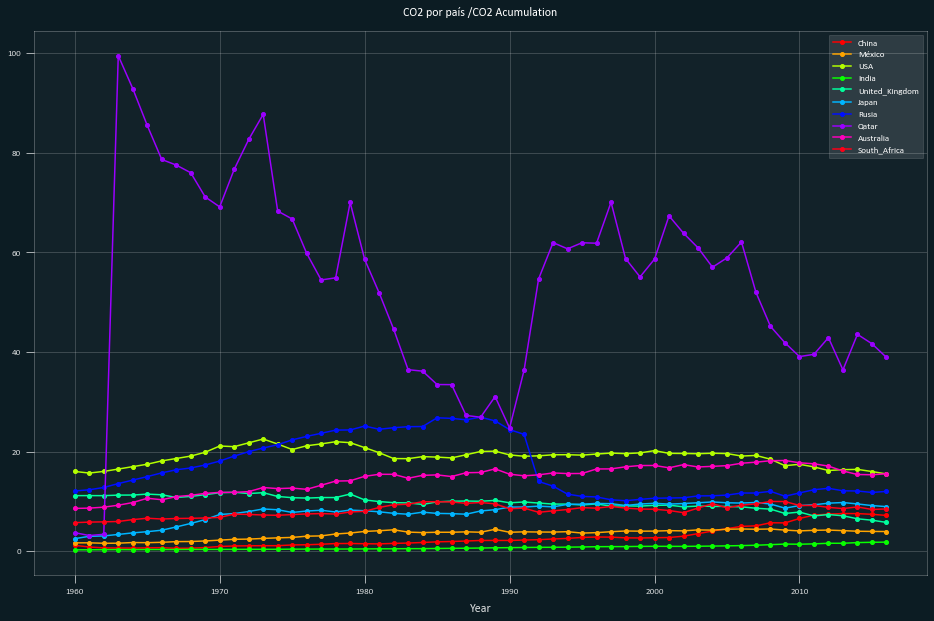

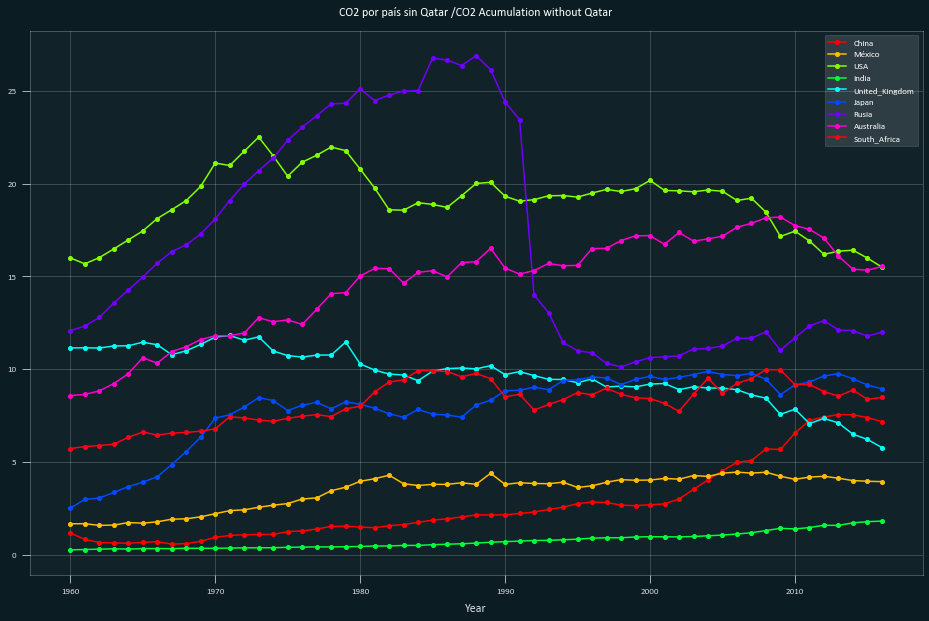

In [6]:
Pob= DFF.groupby('Year').agg(China =('CO2_CHINA','sum'), México=('CO2_MEX','sum'),USA=('CO2_USA','sum'),
India=('CO2_IND','sum'), United_Kingdom=('CO2_UK','sum'),Japan=('CO2_JPN','sum'),
Rusia=('CO2_RUS','sum'),Qatar=('CO2_QAT','sum'), Australia=('CO2_AUS','sum'),South_Africa=('CO2_SA','sum'))
Pob.plot(kind='line',title= 'CO2 por país /CO2 Acumulation', style='-o', cmap='hsv',figsize=(16,10),grid="on")
Pob2= DFF.groupby('Year').agg(China =('CO2_CHINA','sum'), México=('CO2_MEX','sum'),USA=('CO2_USA','sum'),
India=('CO2_IND','sum'), United_Kingdom=('CO2_UK','sum'),Japan=('CO2_JPN','sum'),
Rusia=('CO2_RUS','sum'), Australia=('CO2_AUS','sum'),South_Africa=('CO2_SA','sum'))
Pob2.plot(kind='line',title= 'CO2 por país sin Qatar /CO2 Acumulation without Qatar', 
style='-o', cmap='hsv',figsize=(16,10),grid="on")

### Conclusions

#### - The pollution for Country is not directly proportional to the population, we have cases like Mexico or South Africa where we can see that CO2 increases "according" the population but also we have contundent cases like Rusia or Qatar, where in the first one the population stayed practically the same and the amount of CO2 drastically deacese (The end of USSR at 1991), and Qatar case is so extrme, we can see the population doesn´t significantly increase at all and the amount of CO2 is the highest in every year (with huge erratic changes through the years). We can say as conclusion that the population is a factor to considere when we are talking about pollution or the amount of CO2, but is not the most influential, instead knowing a bit of history we can set a new hypothesis, "The main reason of CO2 in the atmosphere is the agriculture and ".

#### I am gonna test my hypothesis in a future personal project. Thanks for reading.